<h2> Información!! </h2>

El siguiente modelo es un ejemplo sencillo, con fines de demostrar como entrar un modelo de regresion lineal y luego consumirlo (sacarlo a producción con FastAPI)

EL dataset a utilizar es una encuesta realizada en el 2020, cuenta con 17 registros, nos servira para mostrar este ejemplo, pero no para confiar en el resultado del modelo o para aplicar este modelo en un entorno real.


Importando las librerias que se utilizan durante el transcurso del proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
%cd '/drive/My Drive/Colab Notebooks/Projects/Modelos'
%ls

/drive/My Drive/Colab Notebooks/Projects/Modelos
Encuesta.csv  model.pkl  regresion-model.ipynb


In [ ]:
df = pd.read_csv('Encuesta.csv', sep=',')

In [ ]:
df.tail(5)

,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,salary minimum (pesos COP)
12,Cristian,18,colombia,Database,Java,Back-end and Front-end,2.0,7000000
13,Jefferson,23,colombia,java,NaN,Front-end,1.3,2400000
14,Oscar,21,colombia,Python,Java,Design and management,1.5,3000000
15,Carlos,28,Colombia,Java,Python,Desing and management,1.0,3700000
16,Sergio Alvis,22,Colombia,Java,NaN,Documentation,2.0,2000000


Notamos que hay 8 columnas, por fines practicos vamos a trabajar con 2 columnas. Age of experience y salary minimum (pesos COP) que sera nuestra variable a predecir.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   First name (Optionall)      17 non-null     object 
 1   Years                       17 non-null     int64  
 2   Country                     17 non-null     object 
 3   language Programming        17 non-null     object 
 4   Other Technology            8 non-null      object 
 5   Area dedicated              17 non-null     object 
 6   Age of experience           17 non-null     float64
 7   salary minimum (pesos COP)  17 non-null     int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ KB


La siguiente visualización es opcional. (si lo desea puede saltar a la siguiente celda de codigo)

resumen de la visualización : 

*   Si la edad de la persona es mayor o y igual a 22 años entonces  pintaremos su edad de color rojo

*   Si el salario es mayor tendremos un estilo de color azul que nos indica a simple vista cuales son los salarios mas altos.



In [ ]:
df.head(17).sample(17).style.format({"salary minimum (pesos COP)": "{:20,.0f}", "Age of experience":"{0:.1f}"})\
.bar(subset='salary minimum (pesos COP)', color='lightblue')\
.background_gradient(subset='Age of experience', cmap='winter_r')\
.applymap(lambda x: f"color: {'red' if x >= 22 else 'black'}",subset='Years')

,First name (Optionall),Years,Country,language Programming,Other Technology,Area dedicated,Age of experience,salary minimum (pesos COP)
4,Nathaly,20,Colombia,Java,nan,Analyst,0.0,"2,500,000"
2,Nicolas,24,Colombia,Python,nan,AI & Data Science,1.0,"5,000,000"
6,Jerson,27,Colombia,Java,JavaScript,Developer Android-IOS,2.0,"4,800,000"
13,Jefferson,23,colombia,java,nan,Front-end,1.3,"2,400,000"
8,Juan,21,Colombia,Data Bases,nan,Design and management,0.6,"1,000,000"
9,Constan,23,Colombia,Data bases,nan,Design and management,1.0,"1,500,000"
5,Jackson,21,Colombia,Js,nan,Front-end,0.4,"1,800,000"
7,Alejandro,22,Colombia,Javascrip,UI design,Design,1.0,"1,000,000"
14,Oscar,21,colombia,Python,Java,Design and management,1.5,"3,000,000"
11,Brayan,20,colombia,Data Bases,nan,Design and management,0.3,"1,000,000"


In [ ]:
#Feature
X = df[['Age of experience']].values

#Target (Variable a predecir)
y = df[['salary minimum (pesos COP)']].values

El 10% de nuestros datos seras para pruebas, entrenamos el modelo con el 90% de los datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state=0)

In [ ]:
#Entrenamos el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

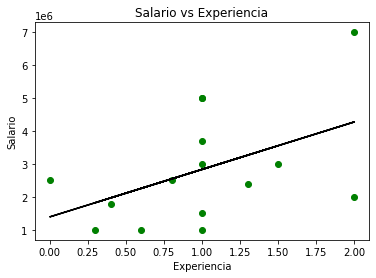

In [ ]:
#Visualización de los datos de entrenamiento
viz_train = plt
viz_train.scatter(X_train, y_train, color = 'green')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

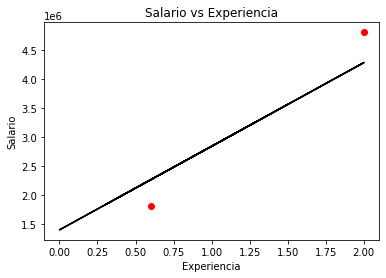

In [ ]:
#Visualización de los datos de prueba 
viz_train = plt
viz_train.scatter(X_test, y_test, color = 'red')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

In [ ]:
#Score del modelo
regressor.score(X_test, y_test)

0.8921137307144845

In [ ]:
#Guardamos el modelo en un archivo pickle
pickle.dump(regressor, open('model.pkl','wb'))

#Importamos el modelo guardado
model = pickle.load(open('model.pkl','rb'))

In [ ]:
#Input para ingresar la edad que tiene el usuario
age_experience = float(input('Cuantos años de experiencia tiene '))

#Predicción del salario que estaria ganando la persona segun la edad digitada.
user_salary = model.predict([[np.array(age_experience)]])

Cuantos años de experiencia tiene 1.5


In [ ]:
#Se redondea la prediccion del salario para no trabajar con decimales
user_salary = np.round(user_salary)
user_salary

array([[3556501.]])

In [ ]:
#Pasamos el array a la matriz que cuenta con los datos de prueba y_test
y_test = np.append(y_test, user_salary,  axis=0)
y_test

array([[1800000.],
       [4800000.],
       [3556501.]])

In [ ]:
#Pasamos la edad de la persona a la matriz de X_test
X_test = np.append(X_test, [[age_experience]],  axis=0)

In [ ]:
X_test

array([[0.6],
       [2. ],
       [1.5]])

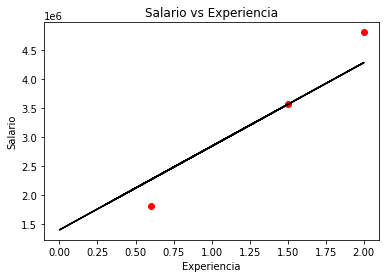

In [ ]:
#Visualización de los datos de prueba con el nuevo salario predicho 
viz_train = plt
viz_train.scatter(X_test, y_test, color = 'red')
viz_train.plot(X_train, regressor.predict(X_train), color = 'black')
viz_train.title('Salario vs Experiencia')
viz_train.xlabel('Experiencia')
viz_train.ylabel('Salario')
viz_train.show()

Ya culminamos el primer paso de entrenar el modelo.

Ahora este modelo lo sacaremos a producción mediante FastAPI.